<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

#Load data

In [2]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
train_labels = df_train.Histology

In [0]:
test_labels = df_test.Histology

#Z score dei dati

In [0]:
mean = train_data.mean(axis=0)
train_data_stand = train_data - mean
std = train_data.std(axis=0)
train_data_stand /= std

In [0]:
test_data_stand = test_data - mean
test_data_stand /= std

##Vettorizzare i label

In [0]:
word_index={'adenocarcinoma':0, 'large cell':1, 'squamous cell carcinoma':2}

In [0]:
train_labels_dec = [word_index[label] for label in train_labels]

In [0]:
test_labels_dec = [word_index[label] for label in test_labels]

In [17]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
one_hot_train_labels = to_categorical(train_labels_dec)
one_hot_test_labels = to_categorical(test_labels_dec)

#PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=0.9, svd_solver='full')

In [24]:
pca.fit(train_data_stand)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [0]:
train_data_stand_pca = pca.transform(train_data_stand)
test_data_stand_pca = pca.transform(test_data_stand)

In [26]:
train_data_stand_pca.shape

(131, 9)

#Build clustering algorithm 

Possiamo descrivere
l’algoritmo k-means come un semplice problema di ottimizzazione, un
approccio iterativo per minimizzare il valore SSE (sum of squared
errors, ovvero la somma degli errori quadratici all’interno del cluster),
che viene anche chiamata inerzia del cluster.


In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0,)

In [29]:
kmeans.fit(train_data_stand_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [30]:
kmeans.labels_

array([2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 0,
       2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2],
      dtype=int32)

In [31]:
kmeans.labels_.shape

(131,)

In [0]:
label_predicted = kmeans.predict(train_data_stand_pca)

In [33]:
label_predicted

array([2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 0,
       2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2],
      dtype=int32)

In [34]:
print(f'Distortion: {kmeans.inertia_}')

Distortion: 6905.872804128035


Sum of squared distances of samples to their closest cluster center

#Metolo Elbow per trovare il numero ottimale di clusters

Non abbiamo bisogno di calcolare esplicitamente il valore SSE, in quanto
risulta già accessibile tramite l’attributo inertia_

Sulla base del valore SSE, possiamo utilizzare uno strumento grafico,
il cosiddetto metodo Elbow per stimare il numero ottimale di cluster k
per un determinato compito. Intuitivamente, possiamo dire che
aumentando k si riduce la distorsione. Questo perché i campioni saranno
più vicini ai centroidi ai quali sono stati assegnati. L’idea su cui si basa
il metodo Elbow è quella di identificare il valore di k in cui la
distorsione comincia a crescere più rapidamente.

Si deve tracciare il grafico della distorsione per più valori
di k 

##Train data

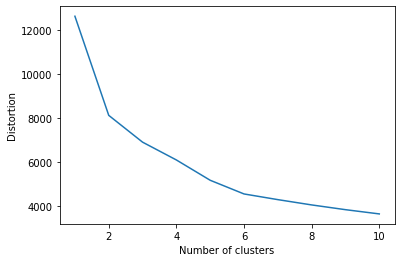

In [0]:
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, init='k-means++', random_state=0)
  km.fit(train_data_stand_pca)
  distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

il gomito è situato in k=2, quindi k=2 dovrebbe rapprensentare una buona scelta per questo dataset (purtroppo)

##Test data

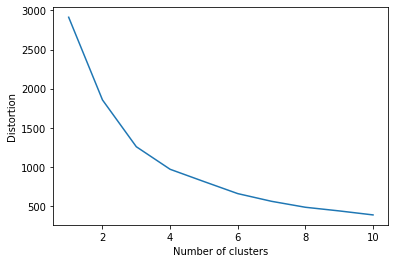

In [0]:
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, init='k-means++', random_state=0)
  km.fit(test_data_stand_pca)
  distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Forse qui viene bene la divisione in 3 clusters

#Grafici a Silhouettes


Un’altra metrica intrinseca per valutare la qualità di un clustering è
l’analisi della silhouet​te, che può essere applicata anche ad algoritmi di
clustering diversi da k-means. L’analisi della silhouette può essere utilizzata come strumento grafico per tracciare una misura della qualità con cui i campioni si raggruppano all’interno dei cluster.

Il coefficiente di silhouette è limitato dall’intervallo da -1 a 1, il valore ideale è 1.

Il coefficiente di silhouette è disponibile come silhouette_samples dal
modulo metric di scikit-learn e, opzionalmente, può essere importato
silhouette_scores. PAG 446 Raschka.

In [0]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [0]:
cluster_labels = np.unique(label_predicted)

In [0]:
cluster_labels

array([0, 1, 2], dtype=int32)

In [0]:
n_cluster = cluster_labels.shape[0]

In [0]:
silhouette_vals = silhouette_samples(train_data_stand_pca, label_predicted, metric='euclidean')

In [0]:
silhouette_vals.shape

(131,)

In [0]:
y_ax_lower, y_ax_upper = 0, 0 

In [0]:
yticks = []

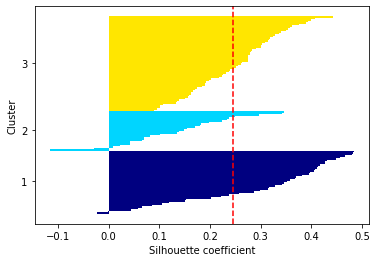

In [0]:
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[label_predicted == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(i/n_cluster)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
           edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper)/2)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

#t-SNE

In [0]:
from sklearn.manifold import TSNE
import seaborn as sns

In [0]:
tsne = TSNE()
X_embedded = tsne.fit_transform(train_data_stand_pca)

In [0]:
X_embedded.shape

(131, 2)

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 3)

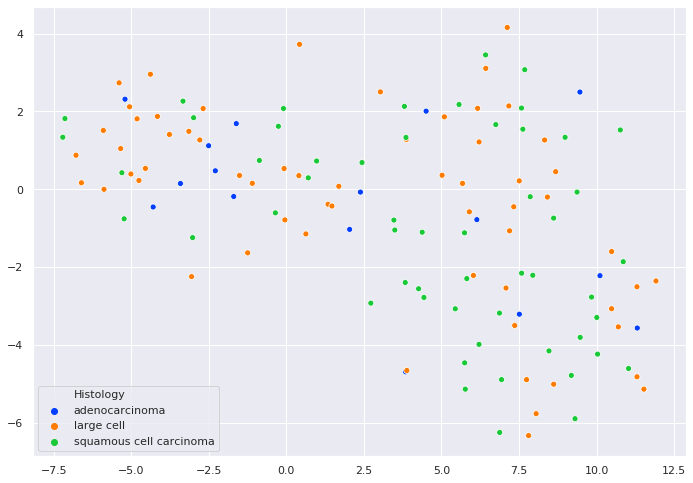

In [0]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=train_labels, legend='full', palette=palette)